In [1]:
import non_dim_lderiv_control as ld
import copy
import gym
import numpy as np
import pandas as pd
import scipy.integrate as si
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import CheckpointCallback

In [2]:
lmin = 0.9
lmax = 1.1
phi_0 = np.pi / 4
phidot_0 = 0
tau = 0.25  # (lmax - lmin) / 4
ldot_max = 0.25
power_max = 0.25

In [3]:
env = ld.Swing()
env.ldot_max = ldot_max
env.lmin = lmin
env.lmax = lmax
env.ldot_max = ldot_max
env.phi_0 = phi_0
env.phidot_0 = phidot_0
env.tau = tau
env.power_max = power_max

/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [4]:
model = SAC.load("w_power_logs/rl_model_300000_steps.zip", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [5]:
env.reset()

array([0.7853982, 0.       , 1.1      ], dtype=float32)

In [23]:
phi_dot_range = np.linspace(-6, 6, 100)

In [24]:
predictions = []
for val in phi_dot_range:
    obs = np.array([phi_0, val, lmin])
    prediction = model.predict(obs, deterministic=True)[0][0]
    predictions.append(prediction)

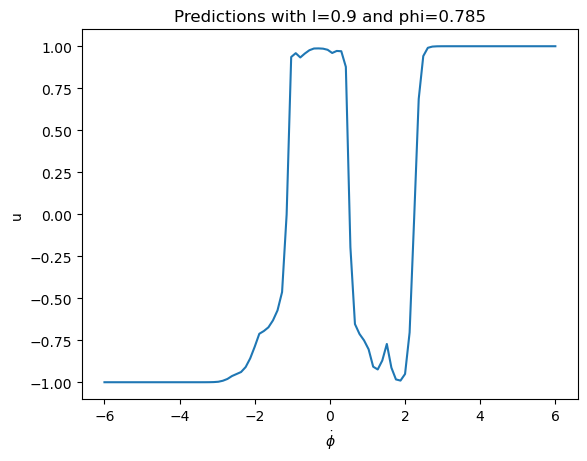

In [29]:
plt.plot(phi_dot_range, predictions)
plt.xlabel(r"$\dot{\phi}$")
plt.ylabel("u")
plt.title(f"Predictions with l={lmin} and phi={np.round(phi_0, 3)}")
plt.show()